In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import r2_score
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
os.chdir("C:\\Users\\Sandeep\\Practice\\Linear_regression\\code\\src")
import modelfit_v1 as mdl 
pd.set_option('display.max_rows',None)
from IPython.display import display
os.chdir("C:\\Users\\Sandeep\\Practice\\Linear_regression\\code")
import var_trans as var_transformation


c:\Users\Sandeep\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
target = 'SalePrice'
data = pd.read_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\output_2.csv")

In [3]:
import pickle
with open('C:\\Users\\Sandeep\\Practice\\Linear_regression\\impute_mv_cont.dictionary', 'rb') as f:
    impute_mv_cont = pickle.load(f)
with open('C:\\Users\\Sandeep\\Practice\\Linear_regression\\impute_mv_cat.dictionary', 'rb') as f:
    impute_mv_cat = pickle.load(f)

In [4]:
var_trans = [var for var in data.columns if '_' in var]

In [5]:
data[var_trans].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LotFrontage__T      1460 non-null   float64
 1   LotArea__T          1460 non-null   float64
 2   OverallQual__T      1460 non-null   float64
 3   YearBuilt__T        1460 non-null   float64
 4   YearRemodAdd__T     1460 non-null   float64
 5   MasVnrArea__T       1460 non-null   float64
 6   BsmtFinSF1__T       1460 non-null   float64
 7   TotalBsmtSF__T      1460 non-null   float64
 8   1stFlrSF__T         1460 non-null   float64
 9   2ndFlrSF__T         1460 non-null   float64
 10  GrLivArea__T        1460 non-null   float64
 11  FullBath_0          1460 non-null   int64  
 12  FullBath_2          1460 non-null   int64  
 13  FullBath_3          1460 non-null   int64  
 14  HalfBath_0          1460 non-null   int64  
 15  HalfBath_2          1460 non-null   int64  
 16  TotRms

                     0                 1                    2           3
0               Model:               OLS      Adj. R-squared:       0.863
1  Dependent Variable:         SalePrice                 AIC:  34249.2265
2                Date:  2025-04-18 21:09                 BIC:  34598.1152
3    No. Observations:              1460      Log-Likelihood:     -17059.
4            Df Model:                65         F-statistic:       142.6
5        Df Residuals:              1394  Prob (F-statistic):        0.00
6           R-squared:             0.869               Scale:  8.6336e+08


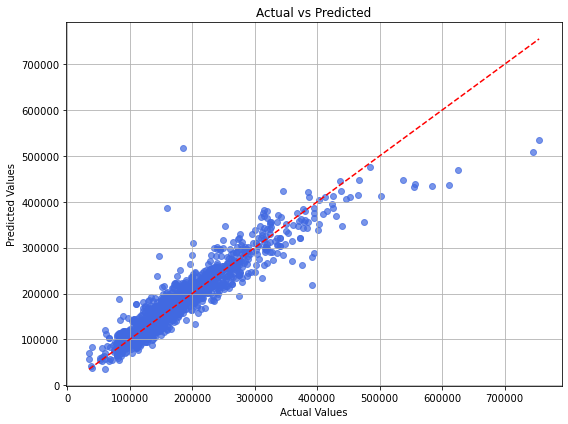

In [6]:
model_perf, summary_df,model = mdl.modelfit(data,var_trans, target)

In [7]:
summary_df

,Variable,Coefficient,Std.Err.,t,p_value,[0.025,0.975],StdDev,Raw_Impact,Contribution,VIF
0,const,-129069.160233,180325.948672,-0.715755,4.742626e-01,-482808.660986,224670.340519,0.000000e+00,-0.000000,0.000000,54989.03
1,LotFrontage__T,0.110975,0.439521,0.252491,8.006989e-01,-0.751218,0.973168,2.241157e+03,248.712205,0.389535,1.64
2,LotArea__T,0.000116,0.000019,6.242308,5.710369e-10,0.000080,0.000152,5.593349e+07,6489.536713,10.163967,1.83
3,OverallQual__T,11896.387248,1122.187057,10.601073,2.629035e-25,9695.029694,14097.744802,1.369444e+00,16291.437598,25.515786,3.99
4,YearBuilt__T,38.352519,84.211518,0.455431,6.488703e-01,-126.842454,203.547493,2.772119e+01,1063.177434,1.665157,9.21
5,YearRemodAdd__T,0.000018,0.000005,3.592369,3.390810e-04,0.000008,0.000028,2.426948e+08,4425.930232,6.931929,2.57
6,MasVnrArea__T,20.858989,7.601584,2.744032,6.146793e-03,5.947212,35.770766,1.679930e+02,3504.164333,5.488252,2.76
7,BsmtFinSF1__T,18.026609,3.129792,5.759682,1.035404e-08,11.886998,24.166220,4.290492e+02,7734.302215,12.113529,3.05
8,TotalBsmtSF__T,21.694511,5.428903,3.996113,6.775754e-05,11.044810,32.344211,3.723352e+02,8077.630541,12.651253,6.90
9,1stFlrSF__T,9.041818,8.251961,1.095718,2.733917e-01,-7.145782,25.229419,3.638027e+02,3289.437944,5.151945,15.23


In [8]:
pd.set_option('display.max_rows',None)
### Remove the variables which are not significant and have high VIF
top_var = summary_df[(summary_df['p_value']<=0.05) & (summary_df['Contribution']>=10)& (summary_df['VIF']<=10)]

In [9]:
var_trans_top = top_var['Variable'].to_list()

                     0                 1                    2           3
0               Model:               OLS      Adj. R-squared:       0.794
1  Dependent Variable:         SalePrice                 AIC:  34790.9425
2                Date:  2025-04-18 21:09                 BIC:  34843.8044
3    No. Observations:              1460      Log-Likelihood:     -17385.
4            Df Model:                 9         F-statistic:       626.6
5        Df Residuals:              1450  Prob (F-statistic):        0.00
6           R-squared:             0.795               Scale:  1.2988e+09


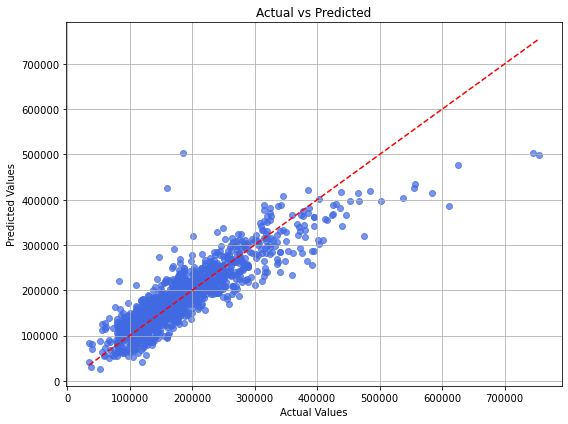

In [10]:
### Refit the model with the top variables
model_perf, summary_df,model = mdl.modelfit(data,var_trans_top, target)

In [11]:
summary_df

,Variable,Coefficient,Std.Err.,t,p_value,[0.025,0.975],StdDev,Raw_Impact,Contribution,VIF
0,const,-28898.700958,7678.016752,-3.763824,1.740125e-04,-43959.909190,-13837.492726,0.000000e+00,-0.000000,0.000000,66.27
1,LotArea__T,0.000261,0.000019,14.090599,2.357042e-42,0.000225,0.000298,5.593349e+07,14613.753109,32.669850,1.21
2,OverallQual__T,28334.211767,998.461522,28.377870,2.900303e-141,26375.628269,30292.795264,1.369444e+00,38802.119776,86.744276,2.10
3,BsmtFinSF1__T,24.915512,2.490021,10.006145,7.730698e-23,20.031083,29.799941,4.290492e+02,10689.980653,23.898041,1.28
4,TotalBsmtSF__T,35.905422,3.437826,10.444222,1.139474e-24,29.161777,42.649067,3.723352e+02,13368.853408,29.886808,1.84
5,FullBath_3,77055.333622,6570.111538,11.728162,2.059144e-30,64167.393783,89943.273462,1.486842e-01,11456.912276,25.612559,1.07
6,BsmtQual_Gd,-19568.521185,3230.003082,-6.058360,1.749541e-09,-25904.499678,-13232.542693,4.942495e-01,-9671.731162,21.621688,2.86
7,BsmtQual_TA,-27284.937636,3310.955888,-8.240804,3.783795e-16,-33779.713265,-20790.162008,4.970828e-01,-13562.872126,30.320548,3.04
8,KitchenQual_Gd,-13810.118667,3720.284327,-3.712114,2.133157e-04,-21107.833525,-6512.403808,4.903435e-01,-6771.702356,15.138514,3.74
9,KitchenQual_TA,-28378.330250,3861.522164,-7.349001,3.321792e-13,-35953.097444,-20803.563056,5.001596e-01,-14193.693979,31.730785,4.19


In [12]:
data[var_trans_top].corr().style.background_gradient(cmap='coolwarm')

,LotArea__T,OverallQual__T,BsmtFinSF1__T,TotalBsmtSF__T,FullBath_3,BsmtQual_Gd,BsmtQual_TA,KitchenQual_Gd,KitchenQual_TA
LotArea__T,1.000000,0.264254,0.217614,0.385413,0.170745,0.027016,-0.099107,0.032971,-0.109808
OverallQual__T,0.264254,1.000000,0.224470,0.537276,0.183673,0.348003,-0.502997,0.410315,-0.561898
BsmtFinSF1__T,0.217614,0.224470,1.000000,0.461677,0.029561,0.066311,-0.118913,0.032918,-0.104835
TotalBsmtSF__T,0.385413,0.537276,0.461677,1.000000,0.138027,0.144057,-0.259436,0.186273,-0.328337
FullBath_3,0.170745,0.183673,0.029561,0.138027,1.000000,-0.055667,-0.034027,0.035299,-0.097816
BsmtQual_Gd,0.027016,0.348003,0.066311,0.144057,-0.055667,1.000000,-0.766391,0.449540,-0.357990
BsmtQual_TA,-0.099107,-0.502997,-0.118913,-0.259436,-0.034027,-0.766391,1.000000,-0.392243,0.447369
KitchenQual_Gd,0.032971,0.410315,0.032918,0.186273,0.035299,0.449540,-0.392243,1.000000,-0.824457
KitchenQual_TA,-0.109808,-0.561898,-0.104835,-0.328337,-0.097816,-0.357990,0.447369,-0.824457,1.000000


#### 2. Instead of calling library for fitting linear regression lets fit the linear regression using Normal equation

The Normal equation is $$\theta = (X^T X)^{-1} X^T Y$$
Where X is feature matrix <br>
Y is target vector <br>
$\theta$ is coefficient vector <br>

In [13]:
X = np.array(data[var_trans_top]) 
#### Adding intercept to the model
X = np.insert(X,0,1,axis =1) 
X_tran = X.T
### Calculating the coefficients using normal equation
theta = np.linalg.inv((X_tran@X))@X_tran@data[target].values
var_trans_top.insert(0,'Intercept')
coef_data = pd.DataFrame({'Var':var_trans_top,'Coefficient':theta})

In [14]:
coef_data

,Var,Coefficient
0,Intercept,-28898.700958
1,LotArea__T,0.000261
2,OverallQual__T,28334.211767
3,BsmtFinSF1__T,24.915512
4,TotalBsmtSF__T,35.905422
5,FullBath_3,77055.333622
6,BsmtQual_Gd,-19568.521185
7,BsmtQual_TA,-27284.937636
8,KitchenQual_Gd,-13810.118667
9,KitchenQual_TA,-28378.330250


##### Conclusion : The coefficient which we have got from normal equation is same as the coefficient which we got from statsmodel library. Behind the curtain, the statsmodel library is also using the normal equation to calculate the coefficients.


##### "We were able to do this because the loss function of Linear Regression, which is the sum of squared errors, has a closed-form solution, i.e., its global minimum exists." This is true because the sum of squared errors (SSE) is a convex function, and for convex functions, the global minimum can be found using calculus or matrix operations, as demonstrated by the Normal Equation.

##### 3. Lets visualize the Gradient Descent with single feature 

Lets assume that OverallQual__T is only fature avaiable

Gradient Descent is given by $$\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$$ <br>
where $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 $$ <br>
Since we have assume only one feature , $$h_\theta(X) = \theta_0 X_0 + \theta_1 X_1$$ <br>
$$\theta := \theta - \frac{\alpha}{2m} \sum_{i=1}^{m}( h_\theta(x^{(i)}) - y^{(i)})(x^{(i)})$$

In [15]:
def gradient_descent(X, Y, theta):
    """
    Gradient descent function to update theta values.
    """

    loss = X.dot(theta) - Y
    sum_loss = ((X.T)@(loss))*(alpha/m)
    theta_new = theta - sum_loss
    return theta_new
# def grad_descent_chart(X, Y, Y_pred):
#     import matplotlib.pyplot as plt
#     """
#     Function to plot the gradient descent chart.
#     """
#     plt.scatter(X[:, 1], Y, color='blue', label='Data Points')
#     plt.plot(X[:, 1], Y_pred, color='red', label='Gradient Descent Line')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Gradient Descent Chart')
#     plt.legend()
#     plt.show()

In [16]:
var = 'OverallQual__T'
alpha = 0.01
X = np.array(data[[var]])
X = np.insert(X, 0, 1, axis=1) 
theta = np.zeros((X.shape[1], 1))
Y = data[target].values.reshape(-1, 1)



In [17]:
iter =1000
theta_list = []
theta_list.append(theta)
for i in range(iter):
    m = 1460 ### Number of rows in the dat
    theta = gradient_descent(X,Y,theta)
    ## save the theta values in a list for animation
    theta_list.append(theta)
    
    

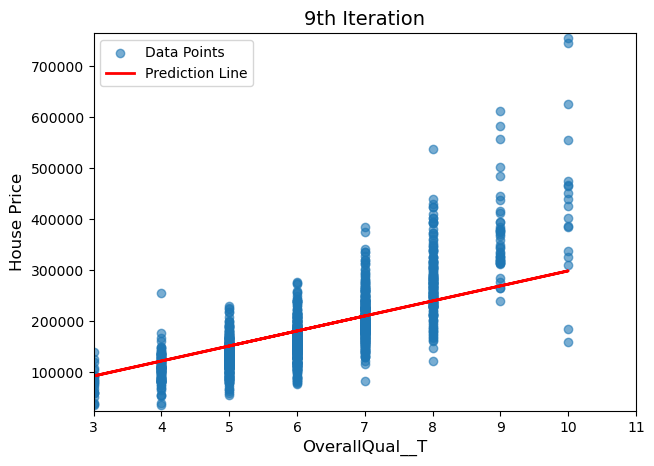

In [18]:
# Set up high-resolution figure
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)  # Increased DPI for sharper text

# Plot the actual data points
ax.scatter(X[:, 1], Y, label='Data Points', alpha=0.6)

# Set axis labels and title
ax.set_xlabel(var, fontsize=12)
ax.set_ylabel('House Price', fontsize=12)
ax.set_title('Gradient Descent Animation', fontsize=14)

# Set axis limits with padding
ax.set_xlim(X[:, 1].min(), X[:, 1].max()+1)
ax.set_ylim(Y.min() - 10000, Y.max() + 10000)

# Create the prediction line (initially empty)
line, = ax.plot([], [], color='red', label='Prediction Line', linewidth=2)

# Add legend
ax.legend()

# Define the animation function
def animate(i):
    theta = theta_list[i]
    y_val = X @ theta
    line.set_data(X[:, 1], y_val)
    ax.set_title(f"{i}th Iteration", fontsize=14)
    return line,

# Create the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=500)

# Convert to HTML video for Jupyter display
video = anim.to_html5_video()
HTML(video)

In [19]:
var_trans_top

['Intercept',
 'LotArea__T',
 'OverallQual__T',
 'BsmtFinSF1__T',
 'TotalBsmtSF__T',
 'FullBath_3',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'KitchenQual_Gd',
 'KitchenQual_TA']

In [20]:
#### Validate the model on test data - unfortunately we do not have the test data target values to check the degree of fit
test_data = pd.read_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\test.csv")
test_data  = var_transformation.vartransformation(test_data,impute_mv_cont,impute_mv_cat)
X = test_data[var_trans_top[1:]]
X_const = sm.add_constant(X)
y_pred_test = model.predict(X_const)

### END